In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Natural Language Processing
**Natural Language Processing or NLP** is a branch of Artificial Intelligence which deal with bridging the machines understanding humans in their Natural Language. Natural Language can be in form of text or sound, which are used for humans to communicate each other. NLP can enable humans to communicate to machines in a natural way. 


**Text Classification** is a process involved in Sentiment Analysis. It is classification of peoples opinion or expressions into different sentiments. Sentiments include *Positive, Neutral*, and *Negative*, *Review Ratings* and *Happy, Sad*. Sentiment Analysis can be done on different consumer centered industries to analyse people's opinion on a particular product or subject. 
![Sentiment Analysis](https://media-exp1.licdn.com/dms/image/C4D12AQHPAZFZZxBtng/article-cover_image-shrink_600_2000/0?e=1593648000&v=beta&t=eQAR5WOihE2_ZCCAJbsgNyJlaI_GW7u8lDw45zGbfuU)
> Sentiment Classification is a perfect problem in NLP for getting started in it. You can really learn a lot of concepts and techniques to master through doing project. Kaggle is a great place to learn and contribute your own ideas and creations. I learnt lot of things from other, now it's my turn to make document my project.

I will go through all the key and fundament concepts of NLP and Sequence Models, which you will learn in this notebook. 
![Sentiment Analysis](https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto,q_auto,f_auto/gigs/121192228/original/677c209a0a064cb9253973d3663684acf91dab84/do-nlp-projects-with-python-nltk-gensim.jpg)
Let's get started with code without furthur ado.

<font color='red'> If you find this notebook helpful, please leave a UPVOTE to encourage me</font>

##  Importing Dependencies
   We shall start by importing all the neccessary libraries. I will explain the exact use of each library later in this notebook.

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.4.1


#  Dataset Preprocessing
In this notebook, I am using **Sentiment-140** from [Kaggle](https://www.kaggle.com/kazanova/sentiment140). It contains a labels data of 1.6 Million Tweets and I find it a good amount of data to train our model.

In [7]:
df = pd.read_csv('/content/All_News.csv')
df = df.dropna()
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(columns=['level_0','index'])
df.head()

,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
0,2011-01-04,Bone marrow recipients highlight consequences ...,0,0,0.248,0.560,0.192,-0.1779,0
1,2011-01-04,Zardari signs reference to reopen case of Bhut...,0,0,0.000,1.000,0.000,0.0000,0
2,2011-01-06,Grade 21 officer to head NDMA,0,0,0.000,1.000,0.000,0.0000,0
3,2011-01-06,'Pakistan risks becoming a polio transmission ...,0,0,0.296,0.704,0.000,-0.2732,0
4,2011-01-06,2009: US considers journalist’s request for in...,0,0,0.000,1.000,0.000,0.0000,0


You can see the columns are without any proper names. Lets rename them for our reference

In [8]:
df.describe()

,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000
mean,0.167000,0.167000,0.076030,0.830364,0.093605,0.087019,0.167000
std,0.799274,0.799274,0.124271,0.140714,0.109041,0.501812,0.799274
min,-1.000000,-1.000000,0.000000,0.099000,0.000000,-0.979900,-1.000000
25%,0.000000,0.000000,0.000000,0.750000,0.000000,-0.296000,0.000000
50%,0.000000,0.000000,0.000000,0.845000,0.071000,0.000000,0.000000
75%,1.000000,1.000000,0.128000,0.934000,0.161000,0.510600,1.000000
max,1.000000,1.000000,0.821000,1.000000,0.773000,0.973200,1.000000


We are going to train only on text to classify its sentiment. So we can ditch the rest of the useless columns.

In [9]:
output = df.iloc[int(len(df)*0.8):]
output.describe()


,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,0.214931,0.214931,0.061819,0.846333,0.091841,0.119874,0.214931
std,0.779388,0.779388,0.098741,0.122304,0.097534,0.501441,0.779388
min,-1.000000,-1.000000,0.000000,0.227000,0.000000,-0.972900,-1.000000
25%,0.000000,0.000000,0.000000,0.769000,0.000000,-0.173700,0.000000
50%,0.000000,0.000000,0.000000,0.858000,0.078000,0.025800,0.000000
75%,1.000000,1.000000,0.100000,0.940000,0.151000,0.542300,1.000000
max,1.000000,1.000000,0.587000,1.000000,0.773000,0.963800,1.000000


In [10]:
df['Polarity'].value_counts()


 1    4383
 0    3505
-1    2627
Name: Polarity, dtype: int64

Here are decoding the labels. We map **0 -> Negative and 1 -> Positive** as directed by the datset desciption. Now that we decoded we shall now analyse the dataset by its distribution. Because it's important that we have almost small amount of examples for given classes.

Positive: 4383 , Negative: 2627 , Neutral: 3505


Text(0.5, 1.0, 'Sentiment Data Distribution')

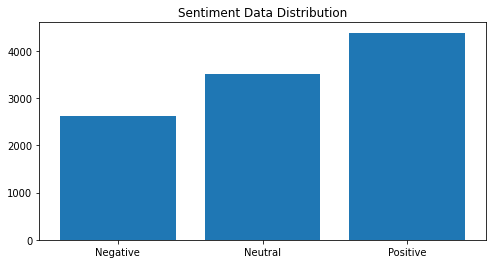

In [11]:
plt.figure(figsize=(8,4))
count_pos = df['Polarity'].value_counts()[1]
count_ntl = df['Polarity'].value_counts()[0]
count_neg = df['Polarity'].value_counts()[-1]

print('Positive:', count_pos, ',', 'Negative:', count_neg, ',', 'Neutral:', count_ntl)

plt.bar(['Negative', 'Neutral', 'Positive'], [count_neg, count_ntl, count_pos])
plt.title("Sentiment Data Distribution")

It's a very good dataset without any skewness. Thank Goodness.

Now let us explore the data we having here... 

In [12]:
import random
random_idx_list = [random.randint(1,len(df)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
9813,2020-09-30,Govt to look after children's health by ensuri...,1,1,0.000,0.860,0.140,0.6369,1
4560,2017-10-01,"Clearance for 42 LPG licences from SNGPL, SSGC...",0,0,0.000,0.966,0.034,0.0772,0
5852,2018-12-04,Nigeria annual inflation dips to lowest in two...,-1,-1,0.144,0.803,0.053,-0.5106,-1
1036,2013-06-04,ECP directs ROs to refrain from 'irrelevant' q...,0,0,0.000,1.000,0.000,0.0000,0
4970,2018-01-29,"Eight-year-old girl allegedly raped in Mardan,...",-1,-1,0.664,0.336,0.000,-0.8720,-1
6369,2019-04-20,"China, Japan see stable growth in bilateral tr...",1,1,0.000,0.723,0.277,0.8225,1
7056,2019-11-14,NAB authorises inquiries' closure due to absen...,1,1,0.000,0.901,0.099,0.5267,1
5451,2018-07-06,PML-N to win election on performance basis - L...,1,1,0.000,0.743,0.257,0.8225,1
1034,2013-05-31,PTI felicitate Pervez Khattak - LAHORE: Pakist...,0,0,0.000,1.000,0.000,0.0000,0
7941,2020-02-21,"Ex-PM Pervez Ashraf, others: Court seeks reply...",0,0,0.000,0.965,0.035,0.2023,0


Looks like we have a nasty data in text. Because in general we use lot of punctuations and other words without any contextual meaning. It have no value as feature to the model we are training. So we need to get rid of them.

# Text Preprocessing
Tweet texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods. Let's continue
![Data Science Meme](https://miro.medium.com/max/800/1*Xhm9c9qDfXa3ZCQjiOvm_w.jpeg)


### Stemming/ Lematization
For grammatical reasons, documents are going to use different forms of a word, such as *write, writing and writes.* Additionally, there are families of derivationally related words with similar meanings. The goal of both stemming and lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.

Stemming usually refers to a process that chops off the ends of words in the hope of achieving goal correctly most of the time and often includes the removal of derivational affixes. 

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base and dictionary form of a word
![Stemming and Lematization](https://qph.fs.quoracdn.net/main-qimg-cd7f4bafaa42639deb999b1580bea69f)

### Hyperlinks and Mentions
Twitter is a social media platform where people can tag and mentions other people's ID and share videos and blogs from internet. So the tweets often contain lots of Hyperlinks and twitter mentions.

- Twitter User Mentions - Eg. @arunrk7, @andrewng
- Hyperlinks - Eg. https://keras.io, https://tensorflow.org

### Stopwords
Stopwords are commonly used words in English which have no contextual meaning in an sentence. So therefore we remove them before classification. Some stopwords are...
![Stopwords English](https://4.bp.blogspot.com/-yiEr-jCVv38/Wmk10d84DYI/AAAAAAAAk0o/IfgjfjpgrxM5NosUQrGw7PtLvgr6DAG8ACLcBGAs/s1600/Screen%2BShot%2B2018-01-24%2Bat%2B5.41.21%2BPM.png)

That looks like a tedious process, isn't?. Don't worry there is always some library in Python to do almost any work. The world is great!!!

**NLTK** is a python library which got functions to perform text processing task for NLP.



In [13]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [14]:
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [15]:
df.text = df['News'].apply(lambda x: preprocess(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [16]:
df.tail()

,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
10510,2021-12-01,Court postpones Gilani's indictment till Febru...,0,0,0.07,0.930,0.000,-0.2732,0
10511,2021-12-01,Commissioner inaugurates anti-polio campaign -...,0,0,0.00,1.000,0.000,0.0000,0
10512,2021-12-01,Anti-polio campaign in full swing - Hussain in...,0,0,0.00,1.000,0.000,0.0000,0
10513,2021-12-01,Procurement of COVID vaccine will take some ti...,0,0,0.00,0.972,0.028,0.0772,0
10514,2021-12-01,Former model Frieha Altaf is the latest target...,0,0,0.00,1.000,0.000,0.0000,0


**Aaww.. It is clean and tidy now. Now let's see some word cloud visualizations of it.**

### Positive Words

            Date  ... Cum
2770  2015-08-26  ...   1
3602  2016-07-03  ...   1
6966  2019-11-10  ...   1
6967  2019-11-10  ...   1
3620  2016-07-11  ...   1
...          ...  ...  ..
1958  2014-10-05  ...   1
9956  2020-10-23  ...   0
5600  2018-08-14  ...   0
10389 2021-01-19  ...   0
10388 2021-01-19  ...   0

[4387 rows x 9 columns]


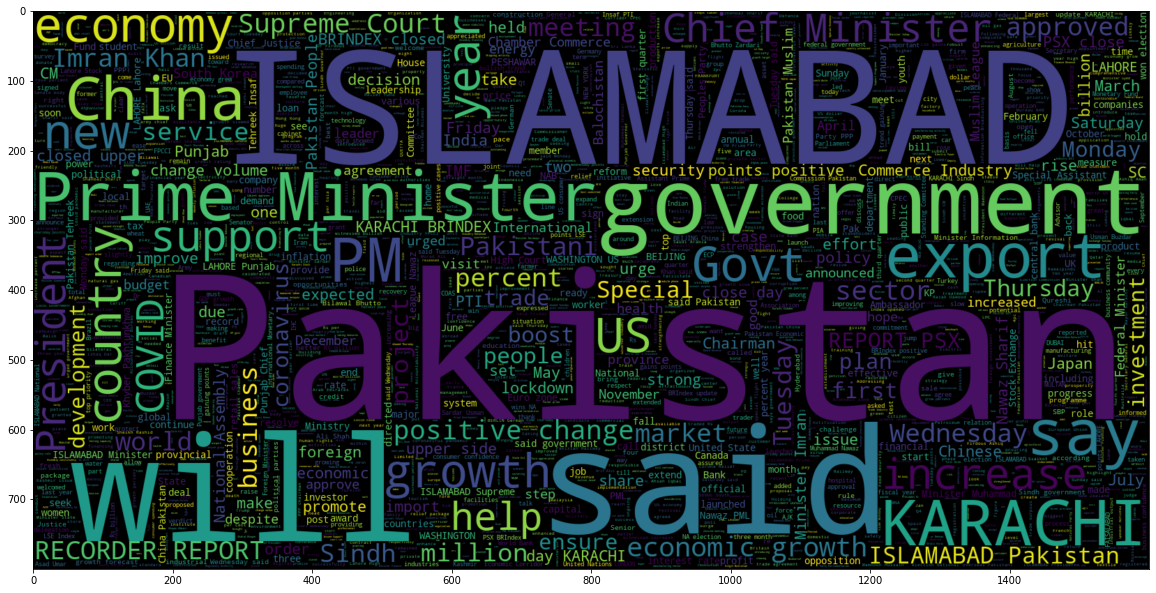

In [17]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 

temp = df.sort_values(by=['Polarity'], ascending = False)
print(temp[0:count_pos+4])
text = ' '.join(temp["News"][0:count_pos])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

In [18]:
df.head()

,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum
0,2011-01-04,Bone marrow recipients highlight consequences ...,0,0,0.248,0.560,0.192,-0.1779,0
1,2011-01-04,Zardari signs reference to reopen case of Bhut...,0,0,0.000,1.000,0.000,0.0000,0
2,2011-01-06,Grade 21 officer to head NDMA,0,0,0.000,1.000,0.000,0.0000,0
3,2011-01-06,'Pakistan risks becoming a polio transmission ...,0,0,0.296,0.704,0.000,-0.2732,0
4,2011-01-06,2009: US considers journalist’s request for in...,0,0,0.000,1.000,0.000,0.0000,0


### Neutral Words

            Date  ... Cum
9956  2020-10-23  ...   0
5600  2018-08-14  ...   0
10389 2021-01-19  ...   0
10388 2021-01-19  ...   0
10386 2021-01-19  ...   0
...          ...  ...  ..
558   2012-05-02  ...   0
565   2012-05-07  ...   0
4432  2017-07-27  ...   0
636   2012-07-07  ...   0
635   2012-07-07  ...   0

[3505 rows x 9 columns]


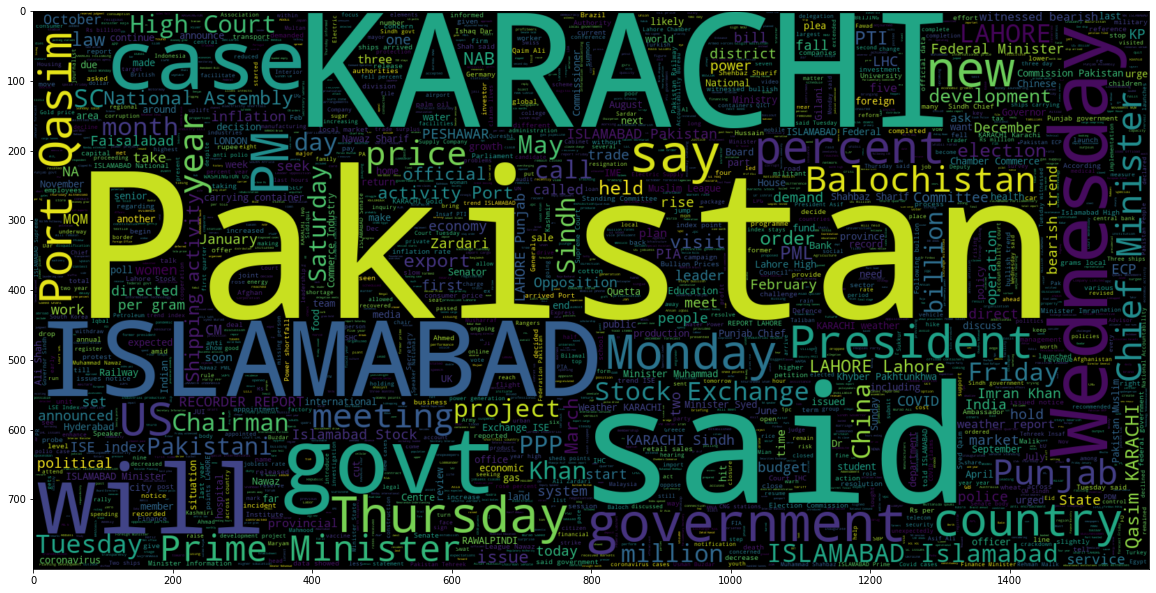

In [19]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
print(temp[count_pos:count_pos + count_ntl])
text = ' '.join(temp["News"][count_pos:count_pos + count_ntl])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

            Date  ... Cum
9634  2020-09-02  ...  -1
9901  2020-10-07  ...  -1
9273  2020-07-15  ...  -1
10011 2020-11-02  ...  -1
10010 2020-11-02  ...  -1
...          ...  ...  ..
7520  2019-12-17  ...  -1
7521  2019-12-17  ...  -1
7522  2019-12-17  ...  -1
7523  2019-12-17  ...  -1
5257  2018-05-14  ...  -1

[2627 rows x 9 columns]


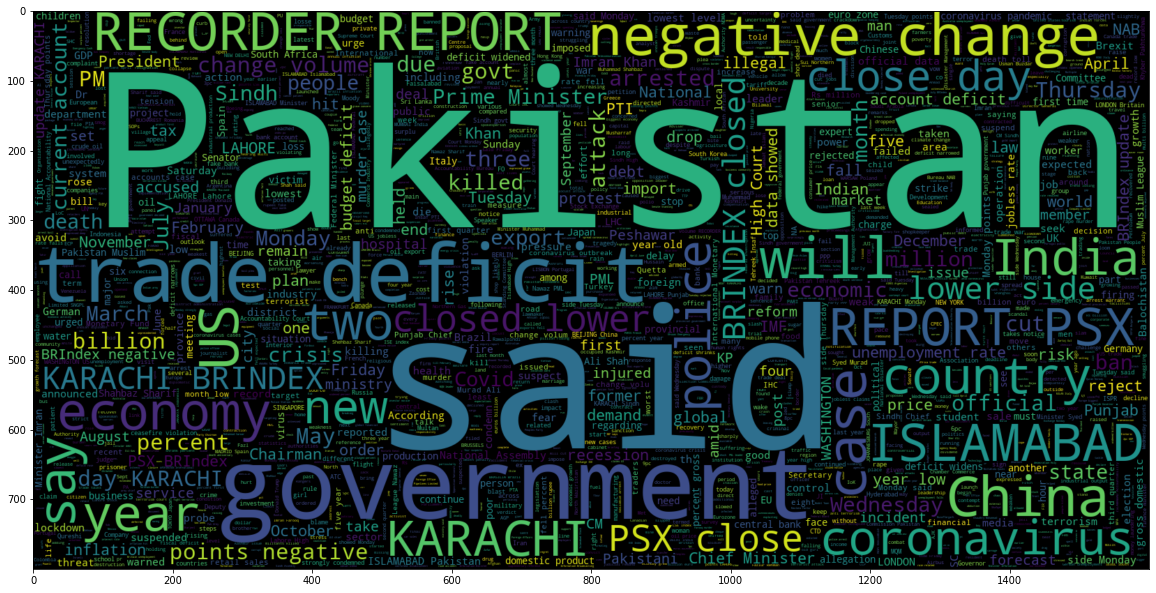

In [20]:
plt.figure(figsize = (20,20)) 
temp = df.sort_values(by=['Polarity'], ascending = False)
print(temp[count_pos + count_ntl:])
text = ' '.join(temp["News"][count_pos + count_ntl:])


    
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(text)
plt.imshow(wc , interpolation = 'bilinear')

## Train and Test Split

In [21]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 100

In [22]:
train_data, dump = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
test_data = df.iloc[int(len(df)*0.8):]
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))
print(train_data)
print(test_data)

Train Data size: 8412
Test Data size 2103
           Date  ... Cum
3192 2016-02-19  ...   0
5335 2018-06-03  ...   1
733  2012-10-01  ...   0
1417 2014-03-07  ...   0
6999 2019-11-12  ...   1
...         ...  ...  ..
919  2013-03-07  ...   0
4307 2017-06-02  ...   0
5699 2018-10-01  ...  -1
537  2012-04-17  ...   0
9412 2020-08-06  ...   1

[8412 rows x 9 columns]
            Date  ... Cum
8412  2020-04-13  ...   1
8413  2020-04-13  ...   1
8414  2020-04-13  ...   1
8415  2020-04-14  ...  -1
8416  2020-04-14  ...  -1
...          ...  ...  ..
10510 2021-12-01  ...   0
10511 2021-12-01  ...   0
10512 2021-12-01  ...   0
10513 2021-12-01  ...   0
10514 2021-12-01  ...   0

[2103 rows x 9 columns]


`train_test_split` will shuffle the dataset and split it to gives training and testing dataset. It's important to shuffle our dataset before training.

In [23]:
train_data.describe()


,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,8412.000000,8412.000000,8412.000000,8412.000000,8412.000000,8412.000000,8412.000000
mean,0.158583,0.158583,0.076428,0.830198,0.093373,0.082067,0.158583
std,0.799510,0.799510,0.124014,0.141356,0.109893,0.502719,0.799510
min,-1.000000,-1.000000,0.000000,0.099000,0.000000,-0.979900,-1.000000
25%,-1.000000,-1.000000,0.000000,0.750000,0.000000,-0.318200,-1.000000
50%,0.000000,0.000000,0.000000,0.845000,0.068000,0.000000,0.000000
75%,1.000000,1.000000,0.129000,0.934250,0.160000,0.510600,1.000000
max,1.000000,1.000000,0.821000,1.000000,0.773000,0.972900,1.000000


# Tokenization
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called *tokens* , perhaps at the same time throwing away certain characters, such as punctuation. The process is called **Tokenization.**
![Tokenization](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

`tokenizer` create tokens for every word in the data corpus and map them to a index using dictionary.

`word_index` contains the index for each word

`vocab_size` represents the total number of word in the data corpus

In [24]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['News'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 17702


Now we got a `tokenizer` object, which can be used to covert any word into a Key in dictionary (number).

Since we are going to build a sequence model. We should feed in a sequence of numbers to it. And also we should ensure there is no variance in input shapes of sequences. It all should be of same lenght. But texts in tweets have different count of words in it. To avoid this, we seek a little help from `pad_sequence` to do our job. It will make all the sequence in one constant length `MAX_SEQUENCE_LENGTH`.

In [25]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data['News']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data['News']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (8412, 100)
Testing X Shape: (2103, 100)


### Label Encoding 
We are building the model to predict class in enocoded form (0 or 1 as this is a binary classification). We should encode our training labels to encodings.

In [26]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_data['Polarity'], num_classes=3)
test_labels = to_categorical(test_data['Polarity'], num_classes=3)
#labels = np.argmax(labels, axis=1)
print(train_data[:10])
print(train_labels[:10])

           Date  ... Cum
3192 2016-02-19  ...   0
5335 2018-06-03  ...   1
733  2012-10-01  ...   0
1417 2014-03-07  ...   0
6999 2019-11-12  ...   1
1900 2014-09-15  ...  -1
1497 2014-04-22  ...   1
1066 2013-06-25  ...  -1
7589 2019-12-26  ...   1
6304 2019-04-03  ...  -1

[10 rows x 9 columns]
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [27]:
y_train = train_labels
y_test = test_labels
#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(y_test)

y_train shape: (8412, 3)
y_test shape: (2103, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Word Emdedding
In Language Model, words are represented in a way to intend more meaning and for learning the patterns and contextual meaning behind it. 

**Word Embedding** is one of the popular representation of document vocabulary.It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

Basically, it's a feature vector representation of words which are used for other natural language processing applications.

We could train the embedding ourselves but that would take a while to train and it wouldn't be effective. So going in the path of Computer Vision, here we use **Transfer Learning**. We download the pre-trained embedding and use it in our model.

The pretrained Word Embedding like **GloVe & Word2Vec** gives more insights for a word which can be used for classification. If you want to learn more about the Word Embedding, please refer some links that I left at the end of this notebook.


In this notebook, I use **GloVe Embedding from Stanford AI** which can be found [here](https://nlp.stanford.edu/projects/glove/)

In [ ]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip


In [30]:
GLOVE_EMB = '/content/drive/MyDrive/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 32
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [31]:
embeddings_index = {}

f = open(GLOVE_EMB, encoding="utf8")
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [32]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [33]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

# Model Training - LSTM
We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly feature in both Positive and Negative tweets. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use **Sequence Models**.

### Sequence Model
![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction. 

For model architecture, we use

1) **Embedding Layer** - Generates Embedding Vector for each input sequence.

2) **Conv1D Layer** - Its using to convolve data into smaller feature vectors. 

3) **LSTM** - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

4) **Dense** - Fully Connected Layers for classification


In [34]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential

In [35]:
print((x_train.shape, y_train.shape, x_test.shape, y_test.shape))

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
#x = Sequential()
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5)(x)
x = Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(3, activation='sigmoid')(x)
print(outputs)
model = tf.keras.Model(sequence_input, outputs)
print(model.summary())

((8412, 100), (8412, 3), (2103, 100), (2103, 3))
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='dense_2/Sigmoid:0', description="created by layer 'dense_2'")
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          5310600   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 300)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 64)            96064     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
______________________________________________________________

### Optimization Algorithm
This notebook uses Adam, optimization algorithm for Gradient Descent. You can learn more about Adam [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

### Callbacks
Callbacks are special functions which are called at the end of an epoch. We can use any functions to perform specific operation after each epoch. I used two callbacks here,

- **LRScheduler** - It changes a Learning Rate at specfic epoch to achieve more improved result. In this notebook, the learning rate exponentionally decreases after remaining same for first 10 Epoch.

- **ModelCheckPoint** - It saves best model while training based on some metrics. Here, it saves the model with minimum Validity Loss.

In [36]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['acc'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Let's start training... It takes a heck of a time if training in CPU, be sure your GPU turned on... May the CUDA Cores be with you....

In [37]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...


In [38]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
263/263 [==============================] - 62s 214ms/step - loss: 0.5812 - acc: 0.5056 - val_loss: 0.4606 - val_acc: 0.6600
Epoch 2/10
263/263 [==============================] - 56s 212ms/step - loss: 0.4452 - acc: 0.6807 - val_loss: 0.4072 - val_acc: 0.7180
Epoch 3/10
263/263 [==============================] - 55s 210ms/step - loss: 0.3945 - acc: 0.7314 - val_loss: 0.3714 - val_acc: 0.7399
Epoch 4/10
263/263 [==============================] - 56s 212ms/step - loss: 0.3567 - acc: 0.7559 - val_loss: 0.3452 - val_acc: 0.7670
Epoch 5/10
263/263 [==============================] - 56s 213ms/step - loss: 0.3314 - acc: 0.7756 - val_loss: 0.2979 - val_acc: 0.8084
Epoch 6/10
263/263 [==============================] - 56s 214ms/step - loss: 0.3100 - acc: 0.7888 - val_loss: 0.2751 - val_acc: 0.8241
Epoch 7/10
263/263 [==============================] - 56s 213ms/step - loss: 0.2703 - acc: 0.8235 - val_loss: 0.2541 - val_acc: 0.8455
Epoch 8/10
263/263 [==============================] - 5

# Model Evaluation
Now that we have trained the model, we can evaluate its performance. We will some evaluation metrics and techniques to test the model.

Let's start with the Learning Curve of loss and accuracy of the model on each epoch.

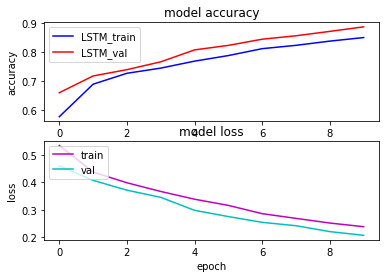

In [39]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['acc'], c= 'b')
at.plot(history.history['val_acc'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The model will output a prediction score between 0 and 1. We can classify two classes by defining a threshold value for it. In our case, I have set 0.5 as THRESHOLD value, if the score above it. Then it will be classified as **POSITIVE** sentiment.

In [40]:
def decode_sentiment(score):
    if score[0] > score[1] and score[0] > score[2]:
        print(score[0], '0\n---')
        return 0
    elif score[1] > score[0] and score[1] > score[2]:
        print(score[1], '1\n---')
        return 1
    elif score[2] > score[0] and score[2] > score[1]:
        print(score[2], '-1\n---')
        return -1

scores = model.predict(x_test, verbose=1, batch_size=10)
print(scores)
y_pred_1d = [decode_sentiment(score) for score in scores]

211/211 [==============================] - 5s 21ms/step
[[0.25374228 0.72023106 0.03003082]
 [0.18340963 0.81118226 0.0074456 ]
 [0.01607281 0.98381287 0.00123879]
 ...
 [0.9784646  0.01645559 0.00406545]
 [0.65172565 0.28689012 0.05378157]
 [0.8212362  0.03396055 0.14007047]]
0.72023106 1
---
0.81118226 1
---
0.98381287 1
---
0.98444396 -1
---
0.994755 -1
---
0.64040625 -1
---
0.9904074 -1
---
0.43776667 0
---
0.68949705 0
---
0.65254307 -1
---
0.9057503 -1
---
0.9537112 -1
---
0.99336636 -1
---
0.93527186 -1
---
0.8616365 -1
---
0.7330253 -1
---
0.95069814 -1
---
0.959239 -1
---
0.4378578 -1
---
0.79796135 -1
---
0.99539155 1
---
0.9989649 1
---
0.46533257 0
---
0.88483 1
---
0.920655 1
---
0.97220075 1
---
0.9908503 1
---
0.99518675 1
---
0.9475715 1
---
0.7173581 1
---
0.92303157 1
---
0.84439814 1
---
0.7557753 -1
---
0.86784196 1
---
0.998752 1
---
0.9291617 1
---
0.8700698 1
---
0.99408233 1
---
0.981905 1
---
0.96768796 1
---
0.99889684 1
---
0.7937567 1
---
0.8323897 1
---
0.9

In [41]:
len(y_pred_1d)

2103

### Confusion Matrix
Confusion Matrix provide a nice overlook at the model's performance in classification task

In [42]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

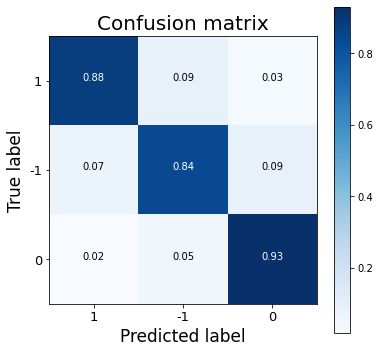

In [43]:
cnf_matrix = confusion_matrix(test_data['Polarity'].to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data['Polarity'].unique(), title="Confusion matrix")
plt.show()

### Classification Scores

In [44]:
print(classification_report(list(test_data['Polarity']), y_pred_1d))

              precision    recall  f1-score   support

          -1       0.85      0.88      0.87       461
           0       0.88      0.84      0.86       729
           1       0.92      0.93      0.92       913

    accuracy                           0.89      2103
   macro avg       0.88      0.88      0.88      2103
weighted avg       0.89      0.89      0.89      2103



It's a pretty good model we trained here in terms of NLP. Around 80% accuracy is good enough considering the baseline human accuracy also pretty low in these tasks. Also, you may go on and explore the dataset, some tweets might have other languages than English. So our Embedding and Tokenizing wont have effect on them. But on practical scenario, this model is good for handling most tasks for Sentiment Analysis.

<h3>Some of the resource and people who help me learn some concepts</h3>
<font color='#008080'>
    <ul>
        <li> <b>Andrew NG's Seqence Model Course</b> at <a href="https://www.coursera.org/learn/nlp-sequence-models"> Coursera</a> </li>
    
<li> <b>Andrej Karpathy's Blog</b> on <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Effectiveness of RNN</a></li>

<li> <b>Intuitive Understanding of GloVe Embedding</b> on <a href="https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010">TDS</a></li>

<li> <b>Keras tutorial on Word Embedding</b> <a href="https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html"> here</a></li>

</ul>
</font>

> <font color='#696969'>I got to say like you, I am still at learning phase in terms of NLP. I have got lot to learn in future. I found that writing this notebook even though it is done by lot of people before me helps me with a deeper and complete understanding our the concepts that I am learning. Kaggle has been a amazing place to learn from and contribute to community of Data Science Aspirants.</font>

In [45]:
output = df.iloc[int(len(df)*TRAIN_SIZE):]

In [46]:
df.describe()

,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000
mean,0.167000,0.167000,0.076030,0.830364,0.093605,0.087019,0.167000
std,0.799274,0.799274,0.124271,0.140714,0.109041,0.501812,0.799274
min,-1.000000,-1.000000,0.000000,0.099000,0.000000,-0.979900,-1.000000
25%,0.000000,0.000000,0.000000,0.750000,0.000000,-0.296000,0.000000
50%,0.000000,0.000000,0.000000,0.845000,0.071000,0.000000,0.000000
75%,1.000000,1.000000,0.128000,0.934000,0.161000,0.510600,1.000000
max,1.000000,1.000000,0.821000,1.000000,0.773000,0.973200,1.000000


In [47]:
output.describe()

,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000
mean,0.214931,0.214931,0.061819,0.846333,0.091841,0.119874,0.214931
std,0.779388,0.779388,0.098741,0.122304,0.097534,0.501441,0.779388
min,-1.000000,-1.000000,0.000000,0.227000,0.000000,-0.972900,-1.000000
25%,0.000000,0.000000,0.000000,0.769000,0.000000,-0.173700,0.000000
50%,0.000000,0.000000,0.000000,0.858000,0.078000,0.025800,0.000000
75%,1.000000,1.000000,0.100000,0.940000,0.151000,0.542300,1.000000
max,1.000000,1.000000,0.587000,1.000000,0.773000,0.963800,1.000000


In [48]:
output['Pred'] = y_pred_1d
output.head(25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,News,Polarity,Sentiment,neg,neu,pos,compound,Cum,Pred
8412,2020-04-13,Sindh CM brief Zardari about coronavirus situa...,1,1,0.000,0.915,0.085,0.4019,1,1
8413,2020-04-13,Jirga demands end to lockdown to allow busines...,1,1,0.046,0.791,0.163,0.5994,1,1
8414,2020-04-13,Govt to take decision on lockdown tomorrow: As...,1,1,0.000,0.759,0.241,0.7430,1,1
8415,2020-04-14,Closure of borders extended by two more weeks ...,-1,-1,0.130,0.794,0.076,-0.4019,-1,-1
8416,2020-04-14,"Govt 'sleepwalking' into virus disaster, says ...",-1,-1,0.292,0.685,0.022,-0.9371,-1,-1
8417,2020-04-14,Coronavirus spillover to weaken Pakistan's eco...,-1,-1,0.090,0.868,0.042,-0.3612,-1,-1
8418,2020-04-14,Murad calls for new National Action Plan to co...,-1,-1,0.101,0.899,0.000,-0.5574,-1,-1
8419,2020-04-14,Rs32.87 billion disbursed among over 2.73 mill...,-1,-1,0.148,0.852,0.000,-0.6369,-1,0
8420,2020-04-14,Over Rs23bn distributed among deserving people...,-1,-1,0.080,0.920,0.000,-0.4019,-1,0
8421,2020-04-14,"Lockdown extended for two weeks, construction ...",-1,-1,0.091,0.909,0.000,-0.4767,-1,-1


In [49]:
output.describe()

,Polarity,Sentiment,neg,neu,pos,compound,Cum,Pred
count,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.000000,2103.00000
mean,0.214931,0.214931,0.061819,0.846333,0.091841,0.119874,0.214931,0.21398
std,0.779388,0.779388,0.098741,0.122304,0.097534,0.501441,0.779388,0.78875
min,-1.000000,-1.000000,0.000000,0.227000,0.000000,-0.972900,-1.000000,-1.00000
25%,0.000000,0.000000,0.000000,0.769000,0.000000,-0.173700,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.858000,0.078000,0.025800,0.000000,0.00000
75%,1.000000,1.000000,0.100000,0.940000,0.151000,0.542300,1.000000,1.00000
max,1.000000,1.000000,0.587000,1.000000,0.773000,0.963800,1.000000,1.00000


In [50]:
df.describe()

,Polarity,Sentiment,neg,neu,pos,compound,Cum
count,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000,10515.000000
mean,0.167000,0.167000,0.076030,0.830364,0.093605,0.087019,0.167000
std,0.799274,0.799274,0.124271,0.140714,0.109041,0.501812,0.799274
min,-1.000000,-1.000000,0.000000,0.099000,0.000000,-0.979900,-1.000000
25%,0.000000,0.000000,0.000000,0.750000,0.000000,-0.296000,0.000000
50%,0.000000,0.000000,0.000000,0.845000,0.071000,0.000000,0.000000
75%,1.000000,1.000000,0.128000,0.934000,0.161000,0.510600,1.000000
max,1.000000,1.000000,0.821000,1.000000,0.773000,0.973200,1.000000
